<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210125(1)_hiddenlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidden Layer
- 입력과 출력 사이에 추가로 layer를 넣어줌
- 히든 레이어가 5개인 경우 Input layer에서 보는 퍼셉트론이 5개가 필요
- 각각의 모델을 연속적으로 연결해서 거대한 신경망을 만듬 > 인공신경망
- 활성화 함수로 'swish'를 사용해서 hidden layer를 쌓아줌
- 더 똑똑한 모델을 만들 수 있음!
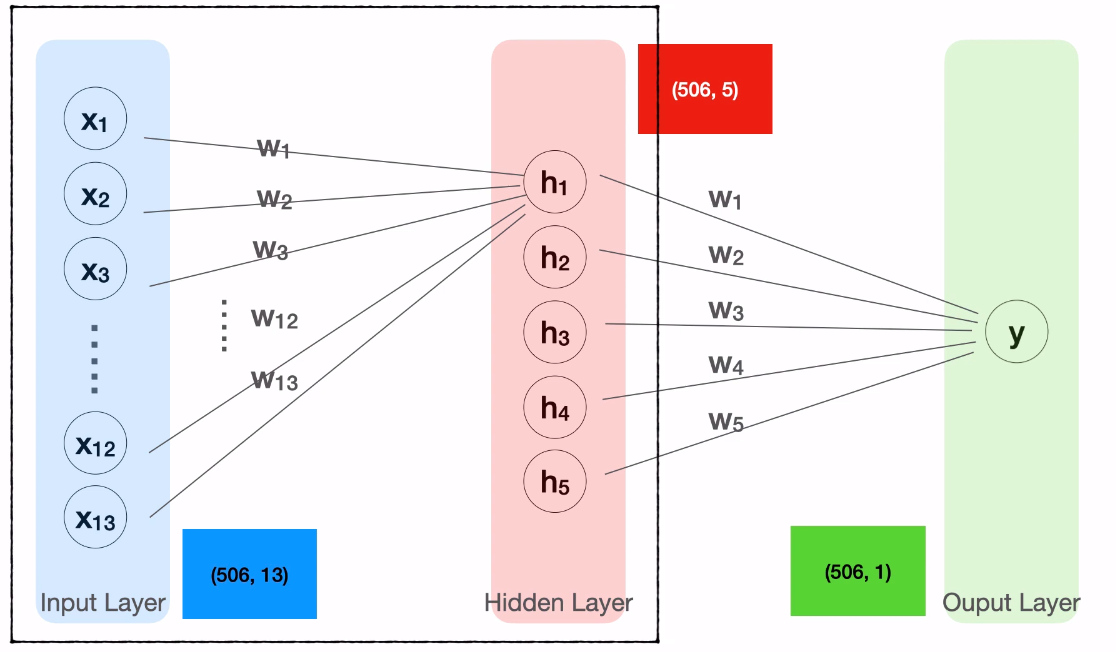


In [1]:
# 라이브러리 사용
import tensorflow as tf
import pandas as pd

# 보스턴 집값 예측

In [2]:
#1. 과거의 데이터 불러오기
path='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
boston = pd.read_csv(path)

독립=boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
종속=boston[['medv']]
print(독립.shape,종속.shape)

(506, 13) (506, 1)


In [4]:
#2. 모델 만들기
X=tf.keras.layers.Input(shape=[13])
H=tf.keras.layers.Dense(10,activation='swish')(X)
Y=tf.keras.layers.Dense(1)(H)
model=tf.keras.models.Model(X,Y)
model.compile(loss='mse')

In [8]:
#3. 모델 학습시키기
model.fit(독립,종속,epochs=1000,verbose=0)
model.fit(독립,종속,epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 21.9238
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 20.8051
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 21.7789
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 19.9751
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 25.2004
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 20.8683
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 19.9012
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 20.8227
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 21.2387
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 19.4831


In [10]:
#모델이 잘 나왔는지 확인
#13개의 입력을 받아 거기서 bias까지 14개의 param을 찾음> 총 10개 > param 140개
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [13]:
#4. 모델을 이용한다
print(model.predict(독립[0:5]))
print(종속[0:5])

[[27.933468]
 [22.823156]
 [29.143353]
 [28.24394 ]
 [27.820335]]
   medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


# 아이리스 품종 분류

In [14]:
#1. 과거의 데이터를 준비
파일경로 ='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스=pd.read_csv(파일경로)

#원핫인코딩
인코딩= pd.get_dummies(아이리스)
인코딩.head()

독립=인코딩[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속=인코딩[['품종_setosa', '품종_versicolor','품종_virginica']]
print(독립.shape,종속.shape)

(150, 4) (150, 3)


In [15]:
#2. 모델의 구조 만들기
# hidden layer 3개 쌓아주기
X=tf.keras.layers.Input(shape=[4])
H=tf.keras.layers.Dense(8,activation='swish')(X)
H=tf.keras.layers.Dense(8,activation='swish')(H)
H=tf.keras.layers.Dense(8,activation='swish')(H)
Y=tf.keras.layers.Dense(3,activation='softmax')(H)
model= tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [17]:
#3. 모델 학습시키기
model.fit(독립,종속,epochs=1000,verbose=0)
model.fit(독립,종속,epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9800
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9867
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9867
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9733
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9800
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9800
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9867
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9800
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9800
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9867


In [18]:
#4. 모델 이용하기
print(model.predict(독립[0:5]))
print(종속[0:5])

[[1.0000000e+00 2.4072773e-11 4.2916364e-09]
 [1.0000000e+00 5.0636505e-11 8.0860056e-09]
 [1.0000000e+00 7.4710259e-11 1.0962088e-08]
 [1.0000000e+00 1.4626442e-10 1.6925807e-08]
 [1.0000000e+00 3.3021648e-11 5.2940887e-09]]
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0
1          1              0             0
2          1              0             0
3          1              0             0
4          1              0             0


In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
